In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt

In [3]:
# Uploading the data
df = pd.read_csv('/content/sample_data/hrm-employee-attrition_unclean.csv')

In [4]:
# Labeling the target varialbe and replacing the nominal values with numerical-binary ones (1 and 0)
label_col = "Attrition"
df[label_col].replace({'No': 0, 'Yes': 1}, inplace=True)

In [5]:
# replacing the nominal values with numerical ones
df['BusinessTravel'].replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace=True)

In [6]:
# replacing the nominal values with numerical ones
df['Gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [7]:
type_to_col = {'continuous':
['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'SalaryAddition', "YearlyHollidayDays", "TrainingTimesLastYear", "DrivingKilometers"],
'ordinal': ['BusinessTravel', 'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',  'WorkLifeBalance', 'StandardHours'],
'categorical': ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18']}

In [8]:
# Converting nominal-categorial and ordinal variables into categorial data type
for col in type_to_col['categorical']:
    df[col] = df[col].astype('category')

for col in type_to_col['ordinal']:
    df[col] = df[col].astype('category')

# Question 7 - Missing values check

In [9]:
# Computing Total number of missing values and the percentage of missing values before changing the data
missing_values_df = df.isna().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})

missing_values_df["% of Missing Values"] = round((missing_values_df["Total No. of Missing Values"]/len(df))*100,2)

missing_values_df

,Total No. of Missing Values,% of Missing Values
Unnamed: 0,0,0.00
Attrition,0,0.00
Age,0,0.00
BusinessTravel,0,0.00
DailyRate,0,0.00
Department,0,0.00
DistanceFromHome,0,0.00
Education,0,0.00
EducationField,0,0.00
EnvironmentSatisfaction,0,0.00


In [10]:
# Singeling the variables that have missing values
cols_missings = missing_values_df[missing_values_df['Total No. of Missing Values'] > 0].index
cols_missings

Index(['NumCompaniesWorked', 'TrainingTimesLastYear',
       'YearsSinceLastPromotion', 'SalaryAddition', 'YearlyHollidayDays',
       'DrivingKilometers'],
      dtype='object')

In [23]:
# Function to identify missing mechanism
def MissingMechanism(df, significant_level=0.05):
    missing_matt = df.isna()
    numeric_columns_names = df.select_dtypes("number").columns
    distribution_change_df = {} #pd.DataFrame()
    i = 0
    for numeric_missing_column_name in numeric_columns_names: # -> only numeric variables that have missing values
            df_without_na = df[missing_matt[numeric_missing_column_name] == 0]
            for numeric_column_name in numeric_columns_names: # -> all numeric variables in data: with and without missing values
                if numeric_missing_column_name != numeric_column_name:
                    series_with_na = df[numeric_column_name]
                    series_without_na = df_without_na[numeric_column_name]
                    ks_result = stats.ks_2samp(series_with_na, series_without_na)
                    distribution_change_df[i] = dict(
                        {
                            'var_1_missing' : numeric_missing_column_name,
                            'var_2': numeric_column_name,
                            'missings_number': sum(missing_matt[numeric_missing_column_name]),
                            'distribution_changed': '+' if ks_result[1] < significant_level else '-', #  ftz_result[1] -> gives us the p-value
                            'imputation': 'no' if (ks_result[1] < significant_level) else 'yes'
                        })
                    i = i + 1

    return pd.DataFrame(distribution_change_df).transpose()

In [24]:
(df['Unnamed: 0'] == df.index).sum() == df.shape[0]

True

In [ ]:
# 'Unnamed: 0', 'Over18', 'StandardHours', 'DrivingKilometers' should be deleted.
# 'Unnamed: 0' column is actually another index, therefore it should be remove as it doesn't have a meaning or a contributing value
# 'Over18' is always true, therefore we can discard this feature
# 'StandardHours' is always 80, therefore we can discard this feature
# 'DrivingKilometers' more than 70% missings

In [ ]:
# Categorical vars are: ['Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18']
# All this variables should be treated as categorical variables. Even though 'Over18' should be deleted as mentioned before
# 'Gender' is Boolean.

In [25]:
# df with no categorical or ordinal variables, only continuous
df_no_categories = df[type_to_col['continuous']].copy()

In [26]:
# Imputation
res = MissingMechanism(df_no_categories)
res.imputation.value_counts()

yes    269
no       3
Name: imputation, dtype: int64

In [27]:
# Filtering data that had not been through imputation
res[res.imputation == 'no']

,var_1_missing,var_2,missings_number,distribution_changed,imputation
208,SalaryAddition,Age,173,+,no
212,SalaryAddition,MonthlyIncome,173,+,no
216,SalaryAddition,TotalWorkingYears,173,+,no


In [19]:
res.iloc[208], res.iloc[212], res.iloc[216]

(var_1_missing           SalaryAddition
 var_2                              Age
 missings_number                    173
 distribution_changed                 +
 imputation                          no
 Name: 208, dtype: object,
 var_1_missing           SalaryAddition
 var_2                    MonthlyIncome
 missings_number                    173
 distribution_changed                 +
 imputation                          no
 Name: 212, dtype: object,
 var_1_missing              SalaryAddition
 var_2                   TotalWorkingYears
 missings_number                       173
 distribution_changed                    +
 imputation                             no
 Name: 216, dtype: object)

In [20]:
# Filtering data that had been through imputation and singeling "SalaryAddition"
res[(res.imputation == 'yes') & (res.var_1_missing == 'SalaryAddition')]

,var_1_missing,var_2,missings_number,distribution_changed,imputation
209,SalaryAddition,DailyRate,173,-,yes
210,SalaryAddition,DistanceFromHome,173,-,yes
211,SalaryAddition,HourlyRate,173,-,yes
213,SalaryAddition,MonthlyRate,173,-,yes
214,SalaryAddition,NumCompaniesWorked,173,-,yes
215,SalaryAddition,PercentSalaryHike,173,-,yes
217,SalaryAddition,YearsAtCompany,173,-,yes
218,SalaryAddition,YearsInCurrentRole,173,-,yes
219,SalaryAddition,YearsSinceLastPromotion,173,-,yes
220,SalaryAddition,YearsWithCurrManager,173,-,yes


In [ ]:
# Almost all columns can be imputed except Salary addition

# Question 8: Clean the data from outliers. Describe which methods are the correct for each variable


In [21]:
# Claculating the IQR and borders
from pandas.api.types import is_numeric_dtype

borders = {}

for i in range(len(type_to_col['continuous'])):
    col = type_to_col['continuous'][i]
    if col == label_col:
        continue
    if col in type_to_col['continuous']:
        q1, q3 = np.percentile(df[col].dropna(), [25, 75])
        iqr = q3 - q1
        borders[col] = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

In [30]:
# Calculating the outliers that are outside the Q1 and Q3
print("This is the outliers")
print(borders)
for col in type_to_col['continuous']:
    print(col, borders[col])
    print(df[(df[col] < borders[col][0]) | (df[col] > borders[col][1])][col])

This is the outliers
{'Age': (10.5, 62.5), 'DailyRate': (-573.0, 2195.0), 'DistanceFromHome': (-16.0, 32.0), 'HourlyRate': (-5.625, 137.375), 'MonthlyIncome': (-5291.0, 16581.0), 'MonthlyRate': (-10574.75, 39083.25), 'NumCompaniesWorked': (-3.5, 8.5), 'PercentSalaryHike': (3.0, 27.0), 'TotalWorkingYears': (-7.5, 28.5), 'YearsAtCompany': (-6.0, 18.0), 'YearsInCurrentRole': (-5.5, 14.5), 'YearsSinceLastPromotion': (-4.5, 7.5), 'YearsWithCurrManager': (-5.5, 14.5), 'SalaryAddition': (-100, 1992.606170931957), 'YearlyHollidayDays': (-8.0, 40.0), 'TrainingTimesLastYear': (0.5, 4.5), 'DrivingKilometers': (-0.32266019460735373, 2.6778736123905396)}
Age (10.5, 62.5)
Series([], Name: Age, dtype: float64)
DailyRate (-573.0, 2195.0)
Series([], Name: DailyRate, dtype: float64)
DistanceFromHome (-16.0, 32.0)
Series([], Name: DistanceFromHome, dtype: float64)
HourlyRate (-5.625, 137.375)
Series([], Name: HourlyRate, dtype: float64)
MonthlyIncome (-5291.0, 16581.0)
25      19094.0
29      18947.0
45 

In [29]:
# Defining new borders for "SalaryAddition"
borders['SalaryAddition'] = (-100, borders['SalaryAddition'][1])

In [31]:
# Function that creates a data frame without outliers from the continuous variables
def get_df_without_outliers(df, threshold=1.5):
    numeric_columns_names = df.select_dtypes("number").columns
    numeric_df = df[[name for name in numeric_columns_names]]
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    no_outliers_df = numeric_df[(numeric_df >= (Q1 - 1.5 * IQR)) & (numeric_df <= (Q3 + 1.5 * IQR))]
    return no_outliers_df

In [32]:
from scipy.stats import t, norm
from math import atanh, pow
from numpy import tanh

def independent_corr(xy, ab, n, n2 = None, twotailed=True, conf_level=0.95, method='fisher'):
    """
    Calculates the statistic significance between two independent correlation coefficients
    @param xy: correlation coefficient between x and y
    @param xz: correlation coefficient between a and b
    @param n: number of elements in xy
    @param n2: number of elements in ab (if distinct from n)
    @param twotailed: whether to calculate a one or two tailed test, only works for 'fisher' method
    @param conf_level: confidence level, only works for 'zou' method
    @param method: defines the method uses, 'fisher' or 'zou'
    @return: z and p-val
    """

    if method == 'fisher':
        xy_z = 0.5 * np.log((1 + xy)/(1 - xy))
        ab_z = 0.5 * np.log((1 + ab)/(1 - ab))
        if n2 is None:
            n2 = n

        se_diff_r = np.sqrt(1/(n - 3) + 1/(n2 - 3))
        diff = xy_z - ab_z
        z = abs(diff / se_diff_r)
        p = (1 - norm.cdf(z))
        if twotailed:
            p *= 2

        return z, p
    elif method == 'zou':
        L1 = rz_ci(xy, n, conf_level=conf_level)[0]
        U1 = rz_ci(xy, n, conf_level=conf_level)[1]
        L2 = rz_ci(ab, n2, conf_level=conf_level)[0]
        U2 = rz_ci(ab, n2, conf_level=conf_level)[1]
        lower = xy - ab - pow((pow((xy - L1), 2) + pow((U2 - ab), 2)), 0.5)
        upper = xy - ab + pow((pow((U1 - xy), 2) + pow((ab - L2), 2)), 0.5)
        return lower, upper
    else:
        raise Exception('Wrong method!')


def OutliersRemoveDecisions(df, y_label, threshold=1.5, significant_level=0.05):
    numeric_columns_names = df.select_dtypes("number").columns
    numeric_df = df[[name for name in numeric_columns_names]]

    with_outliers_df = numeric_df
    without_outliers_df = get_df_without_outliers(numeric_df, threshold)

    distribution_change_df = []

    for name in numeric_columns_names:
        with_outliers_series = with_outliers_df[name]
        without_outliers_series = without_outliers_df[name]

        ks_result = stats.ks_2samp(with_outliers_series, without_outliers_series)

        x_outliers = with_outliers_series
        x_no_outliers = without_outliers_series

        xy = x_outliers.corr(y_label, method='spearman')
        ab = x_no_outliers.corr(y_label, method='spearman')

        n = x_outliers.shape[0]
        n2 = x_no_outliers.shape[0]

        ftz_result = independent_corr(xy, ab, n, n2, method='fisher')
        totout = np.sum(with_outliers_series.count()) - np.sum(without_outliers_series.count())

        distribution_change_df.append(
            {
                'variable' : name,
                'outliers_number': '{} ({})'.format(totout, np.round(totout*100/n,2)),
                'distribution_change': '+' if ks_result[1] < significant_level else '-', #  ks_result[1] -> gives us the p-value
                'correlation_changed': '+' if ftz_result[1] < significant_level else '-', #  ftz_result[1] -> gives us the p-value
                'drop': 'no' if ((ks_result[1] < significant_level) & (ftz_result[1] < significant_level)) else 'yes'
            }
        )

    return pd.DataFrame(distribution_change_df)

In [33]:
OutliersRemoveDecisions(df, df[label_col])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
<ipython-input-32-46624e46f669>:19: RuntimeWarning: divide by zero encountered in scalar divide
  xy_z = 0.5 * np.log((1 + xy)/(1 - xy))


,variable,outliers_number,distribution_change,correlation_changed,drop
0,Unnamed: 0,0 (0.0),-,-,yes
1,Attrition,237 (16.12),+,-,yes
2,Age,0 (0.0),-,-,yes
3,DailyRate,0 (0.0),-,-,yes
4,DistanceFromHome,0 (0.0),-,-,yes
5,HourlyRate,0 (0.0),-,-,yes
6,MonthlyIncome,114 (7.76),+,-,yes
7,MonthlyRate,0 (0.0),-,-,yes
8,NumCompaniesWorked,49 (3.33),-,-,yes
9,PercentSalaryHike,0 (0.0),-,-,yes


In [ ]:
# Based on the algorithm, we can substitute outliers in all variables with NAs. As this was yet performed in the
# dataset, we will continue with this dataset. We only have to add to it the categorical variables from df

In [34]:
# Creating clenaed df
df_cleaned = df.copy()
df_cleaned.columns

Index(['Unnamed: 0', 'Attrition', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'SalaryAddition', 'YearlyHollidayDays',
       'DrivingKilometers'],
      dtype='object')

In [35]:
# Deleting vairables that don't contribute or have too much missing values
del df_cleaned['Unnamed: 0']
# 'Over18' is always "True" therefore we can discard this feature
del df_cleaned['Over18']
# The same as "Over18", the whole column looks the same (constant), therefore it should be removed
del df_cleaned['StandardHours']
del df_cleaned["DrivingKilometers"]  # more than 70% missings

In [36]:
# Removing those varialbes from their respected variable type
type_to_col['categorical'].remove('Over18')
type_to_col['continuous'].remove('DrivingKilometers')
type_to_col['ordinal'].remove('StandardHours')

In [39]:
# A look on the cleaned df
df_cleaned

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryAddition,YearlyHollidayDays
0,1,41.0,1,1102.0,Sales,1.0,2,Life Sciences,2.0,0,...,0,8.0,0.0,1.0,6.0,4.0,NaN,5.0,792.803050,10.0
1,0,49.0,2,279.0,Research & Development,8.0,1,Life Sciences,3.0,1,...,1,10.0,3.0,3.0,10.0,7.0,1.0,7.0,1199.848653,NaN
2,1,37.0,1,1373.0,Research & Development,2.0,2,Other,4.0,1,...,0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,1366.620630,NaN
3,0,33.0,2,1392.0,Research & Development,3.0,4,Life Sciences,4.0,0,...,0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,1770.840125,10.0
4,0,27.0,1,591.0,Research & Development,2.0,1,Medical,1.0,1,...,1,6.0,3.0,3.0,2.0,2.0,2.0,2.0,1043.414893,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36.0,2,884.0,Research & Development,23.0,2,Medical,3.0,1,...,1,17.0,NaN,3.0,5.0,2.0,0.0,3.0,1468.084847,NaN
1466,0,39.0,1,613.0,Research & Development,6.0,1,Medical,4.0,1,...,1,9.0,5.0,3.0,7.0,7.0,1.0,7.0,377.731602,NaN
1467,0,27.0,1,155.0,Research & Development,4.0,3,Life Sciences,2.0,1,...,1,6.0,0.0,3.0,6.0,2.0,0.0,3.0,701.628425,10.0
1468,0,49.0,2,1023.0,Sales,2.0,3,Medical,4.0,1,...,0,17.0,3.0,2.0,9.0,6.0,0.0,8.0,1646.231971,NaN


In [40]:
# Sum of NAs for each varable in cleaned df
df_cleaned.isna().sum()

Attrition                     0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked           45
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear       292
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion      88
YearsWithCurrManager          0
SalaryAd

In [41]:
# Showing the numerical variables in cleaned df
df_cleaned.select_dtypes("number").columns

Index(['Attrition', 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'SalaryAddition', 'YearlyHollidayDays'],
      dtype='object')

In [42]:
# Sort numerical vairables in cleaned df
sorted([elem for elem in list(df_cleaned.select_dtypes("number").columns) if elem != label_col]) == sorted(type_to_col['continuous'])

True

In [45]:
# Defining df without outliers using the predefined function
numeric_columns_names = type_to_col['continuous']
df_cleaned_continuous = df_cleaned[type_to_col['continuous']]
without_outliers_df = get_df_without_outliers(df_cleaned_continuous)
without_outliers_df_label = df_cleaned[label_col]
without_outliers_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryAddition,YearlyHollidayDays,TrainingTimesLastYear
0,41.0,1102.0,1.0,94.0,5993.0,19479.0,8.0,11.0,8.0,6.0,4.0,NaN,5.0,792.803050,10.0,NaN
1,49.0,279.0,8.0,61.0,5130.0,24907.0,1.0,23.0,10.0,10.0,7.0,1.0,7.0,1199.848653,NaN,3.0
2,37.0,1373.0,2.0,92.0,2090.0,2396.0,6.0,15.0,7.0,0.0,0.0,0.0,0.0,1366.620630,NaN,3.0
3,33.0,1392.0,3.0,56.0,2909.0,23159.0,1.0,11.0,8.0,8.0,7.0,3.0,0.0,1770.840125,10.0,3.0
4,27.0,591.0,2.0,40.0,3468.0,16632.0,NaN,12.0,6.0,2.0,2.0,2.0,2.0,1043.414893,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,41.0,2571.0,12290.0,4.0,17.0,17.0,5.0,2.0,0.0,3.0,1468.084847,NaN,NaN
1466,39.0,613.0,6.0,42.0,9991.0,21457.0,4.0,15.0,9.0,7.0,7.0,1.0,7.0,377.731602,NaN,NaN
1467,27.0,155.0,4.0,87.0,6142.0,5174.0,1.0,20.0,6.0,6.0,2.0,0.0,3.0,701.628425,10.0,NaN
1468,49.0,1023.0,2.0,63.0,5390.0,13243.0,2.0,14.0,17.0,9.0,6.0,0.0,8.0,1646.231971,NaN,3.0


In [46]:
# Claculating amount of NAs in the new df
without_outliers_df.isna().sum()

Age                          0
DailyRate                    0
DistanceFromHome             0
HourlyRate                   0
MonthlyIncome              114
MonthlyRate                  0
NumCompaniesWorked          94
PercentSalaryHike            0
TotalWorkingYears           63
YearsAtCompany             104
YearsInCurrentRole          21
YearsSinceLastPromotion    192
YearsWithCurrManager        14
SalaryAddition             187
YearlyHollidayDays         543
TrainingTimesLastYear      479
dtype: int64

In [47]:
without_outliers_df.isna().sum(axis=1).argmax(), without_outliers_df.isna().sum(axis=1).max(), without_outliers_df.shape[1] // 2

(123, 8, 8)

In [48]:
without_outliers_df.iloc[123]

Age                          51.0
DailyRate                   684.0
DistanceFromHome              6.0
HourlyRate                   51.0
MonthlyIncome                 NaN
MonthlyRate                6462.0
NumCompaniesWorked            7.0
PercentSalaryHike            13.0
TotalWorkingYears            23.0
YearsAtCompany                NaN
YearsInCurrentRole            NaN
YearsSinceLastPromotion       NaN
YearsWithCurrManager          NaN
SalaryAddition                NaN
YearlyHollidayDays            NaN
TrainingTimesLastYear         NaN
Name: 123, dtype: float64

In [49]:
# Calculating threshold
threshold_at_least_not_nans = without_outliers_df.shape[1] // 2 + 1
threshold_at_least_not_nans

9

In [51]:
without_outliers_df.iloc[123]

Age                          51.0
DailyRate                   684.0
DistanceFromHome              6.0
HourlyRate                   51.0
MonthlyIncome                 NaN
MonthlyRate                6462.0
NumCompaniesWorked            7.0
PercentSalaryHike            13.0
TotalWorkingYears            23.0
YearsAtCompany                NaN
YearsInCurrentRole            NaN
YearsSinceLastPromotion       NaN
YearsWithCurrManager          NaN
SalaryAddition                NaN
YearlyHollidayDays            NaN
TrainingTimesLastYear         NaN
Name: 123, dtype: float64

In [52]:
without_outliers_df = without_outliers_df.dropna(thresh=threshold_at_least_not_nans)
without_outliers_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryAddition,YearlyHollidayDays,TrainingTimesLastYear
0,41.0,1102.0,1.0,94.0,5993.0,19479.0,8.0,11.0,8.0,6.0,4.0,NaN,5.0,792.803050,10.0,NaN
1,49.0,279.0,8.0,61.0,5130.0,24907.0,1.0,23.0,10.0,10.0,7.0,1.0,7.0,1199.848653,NaN,3.0
2,37.0,1373.0,2.0,92.0,2090.0,2396.0,6.0,15.0,7.0,0.0,0.0,0.0,0.0,1366.620630,NaN,3.0
3,33.0,1392.0,3.0,56.0,2909.0,23159.0,1.0,11.0,8.0,8.0,7.0,3.0,0.0,1770.840125,10.0,3.0
4,27.0,591.0,2.0,40.0,3468.0,16632.0,NaN,12.0,6.0,2.0,2.0,2.0,2.0,1043.414893,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,41.0,2571.0,12290.0,4.0,17.0,17.0,5.0,2.0,0.0,3.0,1468.084847,NaN,NaN
1466,39.0,613.0,6.0,42.0,9991.0,21457.0,4.0,15.0,9.0,7.0,7.0,1.0,7.0,377.731602,NaN,NaN
1467,27.0,155.0,4.0,87.0,6142.0,5174.0,1.0,20.0,6.0,6.0,2.0,0.0,3.0,701.628425,10.0,NaN
1468,49.0,1023.0,2.0,63.0,5390.0,13243.0,2.0,14.0,17.0,9.0,6.0,0.0,8.0,1646.231971,NaN,3.0


In [ ]:
# one row (123) had half of its features NaNs, therefore it was deleted

In [53]:
new_outliers = OutliersRemoveDecisions(df_cleaned[type_to_col['continuous']], df_cleaned[label_col])
new_outliers

,variable,outliers_number,distribution_change,correlation_changed,drop
0,Age,0 (0.0),-,-,yes
1,DailyRate,0 (0.0),-,-,yes
2,DistanceFromHome,0 (0.0),-,-,yes
3,HourlyRate,0 (0.0),-,-,yes
4,MonthlyIncome,114 (7.76),+,-,yes
5,MonthlyRate,0 (0.0),-,-,yes
6,NumCompaniesWorked,49 (3.33),-,-,yes
7,PercentSalaryHike,0 (0.0),-,-,yes
8,TotalWorkingYears,63 (4.29),-,-,yes
9,YearsAtCompany,104 (7.07),+,-,yes


In [ ]:
# Based on the algorithm, we can substitute outliers in all variables with NAs. As this was yet performed in the categorical and ordinal dataset, we will continue with this dataset.
# We only have to add to it the categorical and ordinal variables from original df

In [54]:
bad_idx = df_cleaned.index.isin([123])
df_cleaned = df_cleaned[~bad_idx]
df_cleaned

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryAddition,YearlyHollidayDays
0,1,41.0,1,1102.0,Sales,1.0,2,Life Sciences,2.0,0,...,0,8.0,0.0,1.0,6.0,4.0,NaN,5.0,792.803050,10.0
1,0,49.0,2,279.0,Research & Development,8.0,1,Life Sciences,3.0,1,...,1,10.0,3.0,3.0,10.0,7.0,1.0,7.0,1199.848653,NaN
2,1,37.0,1,1373.0,Research & Development,2.0,2,Other,4.0,1,...,0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,1366.620630,NaN
3,0,33.0,2,1392.0,Research & Development,3.0,4,Life Sciences,4.0,0,...,0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,1770.840125,10.0
4,0,27.0,1,591.0,Research & Development,2.0,1,Medical,1.0,1,...,1,6.0,3.0,3.0,2.0,2.0,2.0,2.0,1043.414893,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,36.0,2,884.0,Research & Development,23.0,2,Medical,3.0,1,...,1,17.0,NaN,3.0,5.0,2.0,0.0,3.0,1468.084847,NaN
1466,0,39.0,1,613.0,Research & Development,6.0,1,Medical,4.0,1,...,1,9.0,5.0,3.0,7.0,7.0,1.0,7.0,377.731602,NaN
1467,0,27.0,1,155.0,Research & Development,4.0,3,Life Sciences,2.0,1,...,1,6.0,0.0,3.0,6.0,2.0,0.0,3.0,701.628425,10.0
1468,0,49.0,2,1023.0,Sales,2.0,3,Medical,4.0,1,...,0,17.0,3.0,2.0,9.0,6.0,0.0,8.0,1646.231971,NaN


In [55]:
# Adding cleaned categorial variables and the target variable to df without outliers
with_categories_df = pd.concat([without_outliers_df, df_cleaned[type_to_col['ordinal']], df_cleaned[type_to_col['categorical']], df_cleaned[label_col]], axis = 1)
with_categories_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
0,41.0,1102.0,1.0,94.0,5993.0,19479.0,8.0,11.0,8.0,6.0,...,1.0,0,1.0,Sales,Life Sciences,0,Sales Executive,Single,Yes,1
1,49.0,279.0,8.0,61.0,5130.0,24907.0,1.0,23.0,10.0,10.0,...,4.0,1,3.0,Research & Development,Life Sciences,1,Research Scientist,Married,No,0
2,37.0,1373.0,2.0,92.0,2090.0,2396.0,6.0,15.0,7.0,0.0,...,2.0,0,3.0,Research & Development,Other,1,Laboratory Technician,Single,Yes,1
3,33.0,1392.0,3.0,56.0,2909.0,23159.0,1.0,11.0,8.0,8.0,...,3.0,0,3.0,Research & Development,Life Sciences,0,Research Scientist,Married,Yes,0
4,27.0,591.0,2.0,40.0,3468.0,16632.0,NaN,12.0,6.0,2.0,...,4.0,1,3.0,Research & Development,Medical,1,Laboratory Technician,Married,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,41.0,2571.0,12290.0,4.0,17.0,17.0,5.0,...,3.0,1,3.0,Research & Development,Medical,1,Laboratory Technician,Married,No,0
1466,39.0,613.0,6.0,42.0,9991.0,21457.0,4.0,15.0,9.0,7.0,...,1.0,1,3.0,Research & Development,Medical,1,Healthcare Representative,Married,No,0
1467,27.0,155.0,4.0,87.0,6142.0,5174.0,1.0,20.0,6.0,6.0,...,2.0,1,3.0,Research & Development,Life Sciences,1,Manufacturing Director,Married,Yes,0
1468,49.0,1023.0,2.0,63.0,5390.0,13243.0,2.0,14.0,17.0,9.0,...,4.0,0,2.0,Sales,Medical,1,Sales Executive,Married,No,0


# Question 9: Clean data for missingness. Deleted variables, variables converterd into categorial, imputed variables

In [56]:
# Creating final df of missing values and their percentage
df_missing_final = pd.DataFrame([with_categories_df.isna().sum(), with_categories_df.isna().sum()/with_categories_df.shape[0]*100]).transpose()
df_missing_final

,0,1
Age,0.0,0.000000
DailyRate,0.0,0.000000
DistanceFromHome,0.0,0.000000
HourlyRate,0.0,0.000000
MonthlyIncome,113.0,7.692308
MonthlyRate,0.0,0.000000
NumCompaniesWorked,94.0,6.398911
PercentSalaryHike,0.0,0.000000
TotalWorkingYears,63.0,4.288632
YearsAtCompany,103.0,7.011572


In [ ]:
# Here we see that there is no variable with more than 40% missingness.
# We don't have to convert any variable to a categorical variable.
# We can see only continuous variables already checked have missing values,
# therefore according to the test done before we will convert them to na

In [57]:
cols_missings_final = df_missing_final[df_missing_final[0] > 0].index
cols_missings, cols_missings_final

(Index(['NumCompaniesWorked', 'TrainingTimesLastYear',
        'YearsSinceLastPromotion', 'SalaryAddition', 'YearlyHollidayDays',
        'DrivingKilometers'],
       dtype='object'),
 Index(['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager', 'SalaryAddition', 'YearlyHollidayDays',
        'TrainingTimesLastYear'],
       dtype='object'))

In [ ]:
# Notice all missings are in continuous columns, but also not exatcly the same as were before (five vars were added - One was removed)

In [58]:
res = MissingMechanism(pd.concat([without_outliers_df, with_categories_df[label_col]], axis = 1))
res.imputation.value_counts()

yes    267
no       5
Name: imputation, dtype: int64

In [59]:
res[res.imputation == 'no']

,var_1_missing,var_2,missings_number,distribution_changed,imputation
71,MonthlyIncome,TotalWorkingYears,113,+,no
152,YearsAtCompany,TotalWorkingYears,103,+,no
208,SalaryAddition,Age,186,+,no
212,SalaryAddition,MonthlyIncome,186,+,no
216,SalaryAddition,TotalWorkingYears,186,+,no


In [60]:
cols_to_not_impute = ['MonthlyIncome', 'YearsAtCompany', 'SalaryAddition']

MonthlyIncome distribution


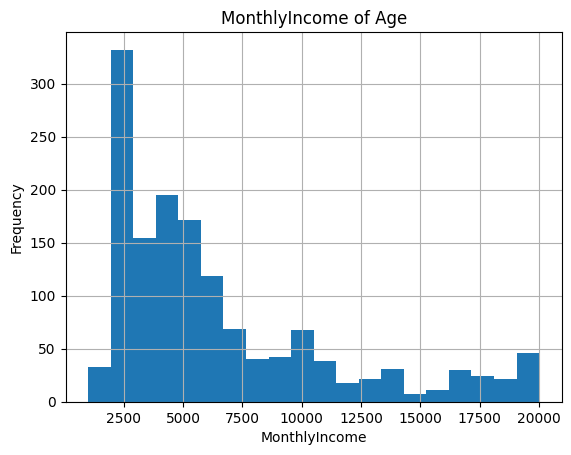

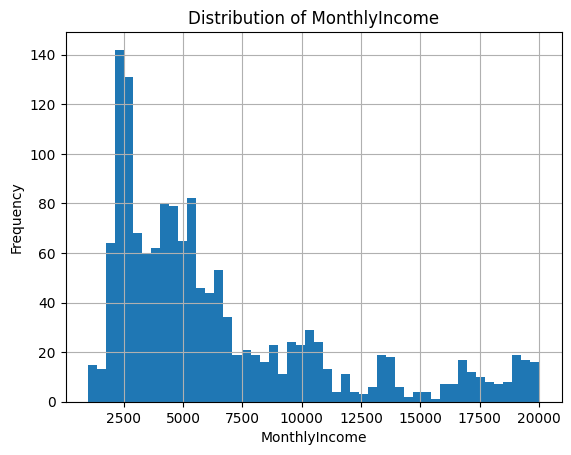

YearsAtCompany distribution


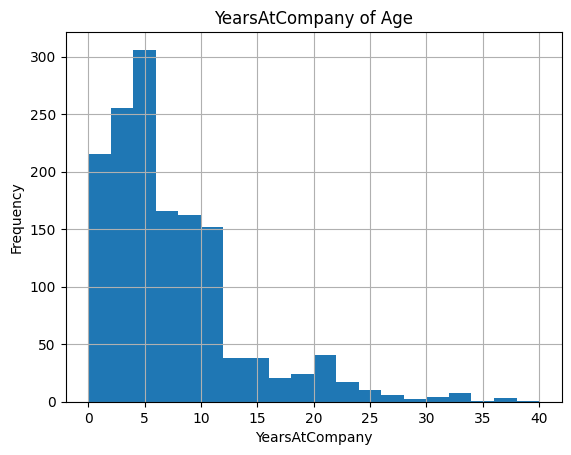

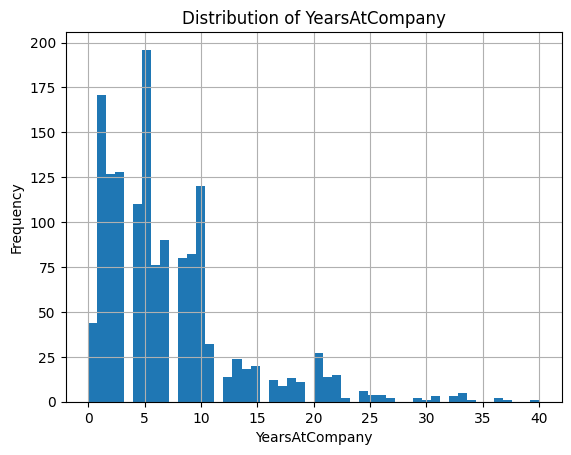

SalaryAddition distribution


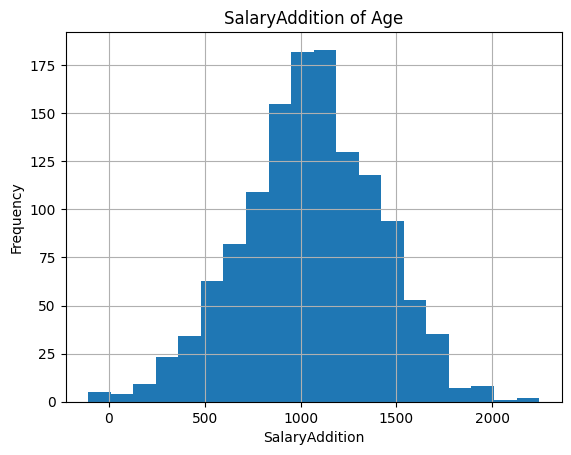

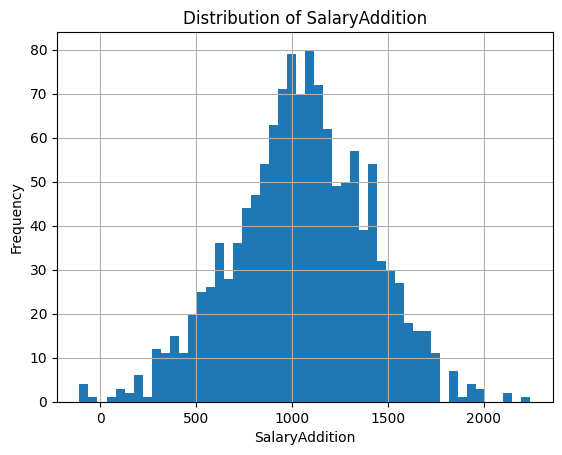

In [61]:
# Plotting variables that were not imputed in order to see their distribution
for col_to_not_impute in cols_to_not_impute:
    print(f"{col_to_not_impute} distribution")
    df[col_to_not_impute].hist(bins=20)
    plt.xlabel(col_to_not_impute)
    plt.ylabel('Frequency')
    plt.title(f"{col_to_not_impute} of Age")
    plt.show()
    df[col_to_not_impute].hist(bins=50)
    plt.xlabel(col_to_not_impute)
    plt.ylabel('Frequency')
    plt.title(f"Distribution of {col_to_not_impute}")
    plt.show()

In [ ]:
# We can see that the distribution of SalaryAddition is normal, however the other two aren't
# (right tailed, therefore there will be different mechnisam treating each of them)

In [62]:
# Setting the threshold
thresholds_MonthlyIncome = [3000, 6500, 7500]
thresholds_YearsAtCompany = [7, 13]

In [63]:
# function that takes a value x and a list of thresholds and converts x into an ordinal category based on the thresholds
def tresholds_to_ordinal(x, thresholds):
    if x == 'unknown':
        return 'unknown'

    for i, threshold in enumerate(thresholds):
        if x < threshold:
            return i

    return len(thresholds)

In [64]:
without_outliers_df['MonthlyIncome'] = without_outliers_df['MonthlyIncome'].fillna('unknown')
without_outliers_df['MonthlyIncome'] = without_outliers_df['MonthlyIncome'].apply(lambda x: tresholds_to_ordinal(x, thresholds_MonthlyIncome))  #  if x is not np.nan else 'unknown'
without_outliers_df['MonthlyIncome']

<ipython-input-64-554ce2eb376a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outliers_df['MonthlyIncome'] = without_outliers_df['MonthlyIncome'].fillna('unknown')
<ipython-input-64-554ce2eb376a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outliers_df['MonthlyIncome'] = without_outliers_df['MonthlyIncome'].apply(lambda x: tresholds_to_ordinal(x, thresholds_MonthlyIncome))  #  if x is not np.nan else 'unknown'


0       1
1       1
2       0
3       0
4       1
       ..
1465    0
1466    3
1467    1
1468    1
1469    1
Name: MonthlyIncome, Length: 1469, dtype: object

In [65]:
without_outliers_df['MonthlyIncome'].value_counts()

1          579
0          395
3          297
unknown    113
2           85
Name: MonthlyIncome, dtype: int64

In [66]:
without_outliers_df['YearsAtCompany'] = without_outliers_df['YearsAtCompany'].fillna('unknown')
without_outliers_df['YearsAtCompany'] = without_outliers_df['YearsAtCompany'].apply(lambda x: tresholds_to_ordinal(x, thresholds_YearsAtCompany))  #  if x is not np.nan else 'unknown'
without_outliers_df['YearsAtCompany']

<ipython-input-66-947cfff39bb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outliers_df['YearsAtCompany'] = without_outliers_df['YearsAtCompany'].fillna('unknown')
<ipython-input-66-947cfff39bb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outliers_df['YearsAtCompany'] = without_outliers_df['YearsAtCompany'].apply(lambda x: tresholds_to_ordinal(x, thresholds_YearsAtCompany))  #  if x is not np.nan else 'unknown'


0       0
1       1
2       0
3       1
4       0
       ..
1465    0
1466    1
1467    0
1468    1
1469    0
Name: YearsAtCompany, Length: 1469, dtype: object

In [67]:
without_outliers_df.YearsAtCompany.value_counts()

0          852
1          418
unknown    103
2           96
Name: YearsAtCompany, dtype: int64

In [ ]:
# looks good

In [69]:
# function that calculates the percentile of a given value x within a list of values xs using a specified number of bins
def percentile(x, xs, num_bins = 100):
    if x == 'unknown':
        return 'unknown'

    thresholds = np.percentile(xs, [i for i in range(1, num_bins + 1)])

    for i in range(len(thresholds)):
        if x < thresholds[i]:
            return i

    return num_bins

In [70]:
xs = without_outliers_df['SalaryAddition'].dropna()
without_outliers_df['SalaryAddition'] = without_outliers_df['SalaryAddition'].fillna('unknown')
without_outliers_df['SalaryAddition'] = without_outliers_df['SalaryAddition'].apply(lambda x: percentile(x, xs))  #  if x is not np.nan else 'unknown'
without_outliers_df['SalaryAddition']

<ipython-input-70-38bd5e06bc85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outliers_df['SalaryAddition'] = without_outliers_df['SalaryAddition'].fillna('unknown')
<ipython-input-70-38bd5e06bc85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outliers_df['SalaryAddition'] = without_outliers_df['SalaryAddition'].apply(lambda x: percentile(x, xs))  #  if x is not np.nan else 'unknown'


0       22
1       66
2       81
3       98
4       48
        ..
1465    88
1466     2
1467    15
1468    95
1469     8
Name: SalaryAddition, Length: 1469, dtype: object

In [71]:
for col in cols_to_not_impute:
    without_outliers_df[col] = without_outliers_df[col].astype('category')

<ipython-input-71-8719707ed64a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outliers_df[col] = without_outliers_df[col].astype('category')
<ipython-input-71-8719707ed64a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outliers_df[col] = without_outliers_df[col].astype('category')
<ipython-input-71-8719707ed64a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
# imputate all what is left

In [72]:
# Sum of NAs left to imputate
without_outliers_df.isna().sum()

Age                          0
DailyRate                    0
DistanceFromHome             0
HourlyRate                   0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked          94
PercentSalaryHike            0
TotalWorkingYears           63
YearsAtCompany               0
YearsInCurrentRole          20
YearsSinceLastPromotion    191
YearsWithCurrManager        13
SalaryAddition               0
YearlyHollidayDays         542
TrainingTimesLastYear      478
dtype: int64

In [ ]:
# We can see that we moved forward (There are less columns with nans)

In [73]:
without_outliers_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryAddition,YearlyHollidayDays,TrainingTimesLastYear
0,41.0,1102.0,1.0,94.0,1,19479.0,8.0,11.0,8.0,0,4.0,NaN,5.0,22,10.0,NaN
1,49.0,279.0,8.0,61.0,1,24907.0,1.0,23.0,10.0,1,7.0,1.0,7.0,66,NaN,3.0
2,37.0,1373.0,2.0,92.0,0,2396.0,6.0,15.0,7.0,0,0.0,0.0,0.0,81,NaN,3.0
3,33.0,1392.0,3.0,56.0,0,23159.0,1.0,11.0,8.0,1,7.0,3.0,0.0,98,10.0,3.0
4,27.0,591.0,2.0,40.0,1,16632.0,NaN,12.0,6.0,0,2.0,2.0,2.0,48,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,41.0,0,12290.0,4.0,17.0,17.0,0,2.0,0.0,3.0,88,NaN,NaN
1466,39.0,613.0,6.0,42.0,3,21457.0,4.0,15.0,9.0,1,7.0,1.0,7.0,2,NaN,NaN
1467,27.0,155.0,4.0,87.0,1,5174.0,1.0,20.0,6.0,0,2.0,0.0,3.0,15,10.0,NaN
1468,49.0,1023.0,2.0,63.0,1,13243.0,2.0,14.0,17.0,1,6.0,0.0,8.0,95,NaN,3.0


In [74]:
# Imputation
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

In [76]:
cols_to_impute =[col for col in without_outliers_df.columns if col not in cols_to_not_impute]
print(cols_to_impute)

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'YearlyHollidayDays', 'TrainingTimesLastYear']


In [77]:
# df of with imputated values
df_withoutliers_imputed = pd.DataFrame(imputer.fit_transform(without_outliers_df[cols_to_impute]), columns=cols_to_impute)
df_withoutliers_imputed

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyHollidayDays,TrainingTimesLastYear
0,41.0,1102.0,1.0,94.0,19479.0,8.0,11.0,8.0,4.0,2.5,5.0,10.0,2.5
1,49.0,279.0,8.0,61.0,24907.0,1.0,23.0,10.0,7.0,1.0,7.0,20.0,3.0
2,37.0,1373.0,2.0,92.0,2396.0,6.0,15.0,7.0,0.0,0.0,0.0,12.5,3.0
3,33.0,1392.0,3.0,56.0,23159.0,1.0,11.0,8.0,7.0,3.0,0.0,10.0,3.0
4,27.0,591.0,2.0,40.0,16632.0,2.5,12.0,6.0,2.0,2.0,2.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,36.0,884.0,23.0,41.0,12290.0,4.0,17.0,17.0,2.0,0.0,3.0,25.0,3.0
1465,39.0,613.0,6.0,42.0,21457.0,4.0,15.0,9.0,7.0,1.0,7.0,23.5,3.0
1466,27.0,155.0,4.0,87.0,5174.0,1.0,20.0,6.0,2.0,0.0,3.0,10.0,2.5
1467,49.0,1023.0,2.0,63.0,13243.0,2.0,14.0,17.0,6.0,0.0,8.0,22.0,3.0


In [78]:
without_outliers_df[cols_to_impute] = pd.DataFrame(imputer.fit_transform(without_outliers_df[cols_to_impute]), columns=cols_to_impute)
without_outliers_df

<ipython-input-78-288116e71d8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outliers_df[cols_to_impute] = pd.DataFrame(imputer.fit_transform(without_outliers_df[cols_to_impute]), columns=cols_to_impute)


,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,SalaryAddition,YearlyHollidayDays,TrainingTimesLastYear
0,41.0,1102.0,1.0,94.0,1,19479.0,8.0,11.0,8.0,0,4.0,2.5,5.0,22,10.0,2.5
1,49.0,279.0,8.0,61.0,1,24907.0,1.0,23.0,10.0,1,7.0,1.0,7.0,66,20.0,3.0
2,37.0,1373.0,2.0,92.0,0,2396.0,6.0,15.0,7.0,0,0.0,0.0,0.0,81,12.5,3.0
3,33.0,1392.0,3.0,56.0,0,23159.0,1.0,11.0,8.0,1,7.0,3.0,0.0,98,10.0,3.0
4,27.0,591.0,2.0,40.0,1,16632.0,2.5,12.0,6.0,0,2.0,2.0,2.0,48,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,39.0,613.0,6.0,42.0,0,21457.0,4.0,15.0,9.0,0,7.0,1.0,7.0,88,23.5,3.0
1466,27.0,155.0,4.0,87.0,3,5174.0,1.0,20.0,6.0,1,2.0,0.0,3.0,2,10.0,2.5
1467,49.0,1023.0,2.0,63.0,1,13243.0,2.0,14.0,17.0,0,6.0,0.0,8.0,15,22.0,3.0
1468,34.0,628.0,8.0,82.0,1,10228.0,2.0,12.0,6.0,1,3.0,1.0,2.0,95,10.0,3.0


In [79]:
df_withoutliers_imputed.index = without_outliers_df.index

In [80]:
without_outliers_df[cols_to_impute] = df_withoutliers_imputed

<ipython-input-80-4567e9a39b70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outliers_df[cols_to_impute] = df_withoutliers_imputed


In [ ]:
# Once again the test shows us the missingness is not at random and therefore should be switch with "unknown"

In [81]:
# Adding categorial vars
with_categories_df = pd.concat([without_outliers_df, df_cleaned[type_to_col['ordinal']], df_cleaned[type_to_col['categorical']], df_cleaned[label_col]], axis = 1)
with_categories_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
0,41.0,1102.0,1.0,94.0,1,19479.0,8.0,11.0,8.0,0,...,1.0,0,1.0,Sales,Life Sciences,0,Sales Executive,Single,Yes,1
1,49.0,279.0,8.0,61.0,1,24907.0,1.0,23.0,10.0,1,...,4.0,1,3.0,Research & Development,Life Sciences,1,Research Scientist,Married,No,0
2,37.0,1373.0,2.0,92.0,0,2396.0,6.0,15.0,7.0,0,...,2.0,0,3.0,Research & Development,Other,1,Laboratory Technician,Single,Yes,1
3,33.0,1392.0,3.0,56.0,0,23159.0,1.0,11.0,8.0,1,...,3.0,0,3.0,Research & Development,Life Sciences,0,Research Scientist,Married,Yes,0
4,27.0,591.0,2.0,40.0,1,16632.0,2.5,12.0,6.0,0,...,4.0,1,3.0,Research & Development,Medical,1,Laboratory Technician,Married,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,41.0,0,12290.0,4.0,17.0,17.0,0,...,3.0,1,3.0,Research & Development,Medical,1,Laboratory Technician,Married,No,0
1466,39.0,613.0,6.0,42.0,3,21457.0,4.0,15.0,9.0,1,...,1.0,1,3.0,Research & Development,Medical,1,Healthcare Representative,Married,No,0
1467,27.0,155.0,4.0,87.0,1,5174.0,1.0,20.0,6.0,0,...,2.0,1,3.0,Research & Development,Life Sciences,1,Manufacturing Director,Married,Yes,0
1468,49.0,1023.0,2.0,63.0,1,13243.0,2.0,14.0,17.0,1,...,4.0,0,2.0,Sales,Medical,1,Sales Executive,Married,No,0


In [82]:
# Creating a final df
df_final = with_categories_df.copy()
df_final

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,...,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Attrition
0,41.0,1102.0,1.0,94.0,1,19479.0,8.0,11.0,8.0,0,...,1.0,0,1.0,Sales,Life Sciences,0,Sales Executive,Single,Yes,1
1,49.0,279.0,8.0,61.0,1,24907.0,1.0,23.0,10.0,1,...,4.0,1,3.0,Research & Development,Life Sciences,1,Research Scientist,Married,No,0
2,37.0,1373.0,2.0,92.0,0,2396.0,6.0,15.0,7.0,0,...,2.0,0,3.0,Research & Development,Other,1,Laboratory Technician,Single,Yes,1
3,33.0,1392.0,3.0,56.0,0,23159.0,1.0,11.0,8.0,1,...,3.0,0,3.0,Research & Development,Life Sciences,0,Research Scientist,Married,Yes,0
4,27.0,591.0,2.0,40.0,1,16632.0,2.5,12.0,6.0,0,...,4.0,1,3.0,Research & Development,Medical,1,Laboratory Technician,Married,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,41.0,0,12290.0,4.0,17.0,17.0,0,...,3.0,1,3.0,Research & Development,Medical,1,Laboratory Technician,Married,No,0
1466,39.0,613.0,6.0,42.0,3,21457.0,4.0,15.0,9.0,1,...,1.0,1,3.0,Research & Development,Medical,1,Healthcare Representative,Married,No,0
1467,27.0,155.0,4.0,87.0,1,5174.0,1.0,20.0,6.0,0,...,2.0,1,3.0,Research & Development,Life Sciences,1,Manufacturing Director,Married,Yes,0
1468,49.0,1023.0,2.0,63.0,1,13243.0,2.0,14.0,17.0,1,...,4.0,0,2.0,Sales,Medical,1,Sales Executive,Married,No,0


# Question 10: Second automatic EDA post manual EDA data (SweetViz and ydata)

In [83]:
!pip install sweetviz
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.8/357.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 18.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7210c53bc2008b44feb7b59d01e24fd6556822c3a230999abcfdd1532ba79109
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling se

In [84]:
import sweetviz as sv

my_report = sv.analyze(df_final)
my_report.show_html('SWEETVIZ_REPORT_FINAL.html') # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT_FINAL.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [85]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_final, title="Profiling Report Final")
profile.to_file("profiling_report_final.html")

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'Function <code object pandas_auto_compute at 0x7e1ab4501000, file "/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/pandas/correlations_pandas.py", line 164>')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]